<a href="https://colab.research.google.com/github/Riddhadipta/Credit-Card-fraud-detection-using-Machine-Learning/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Necessary Libraries
import os
import sklearn
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2)

In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving creditcard_dataset.csv to creditcard_dataset.csv


In [ ]:
df = pd.read_csv("/content/creditcard_dataset.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
len(df)

284807

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info


<bound method DataFrame.info of             Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]>

**Normalizing**

In [ ]:
from sklearn.preprocessing import StandardScaler
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
df = df.drop(['Amount'],axis=1)

**Feature** **Selection**

In [ ]:
df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [ ]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(df[df.Class==1]), len(df[df.Class==1])/len(df)*100000))

Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


In [ ]:
#Plotting Correlation
df2=df.drop(columns = ['Class'])   # drop non numerical columns
corr=df2.corr()

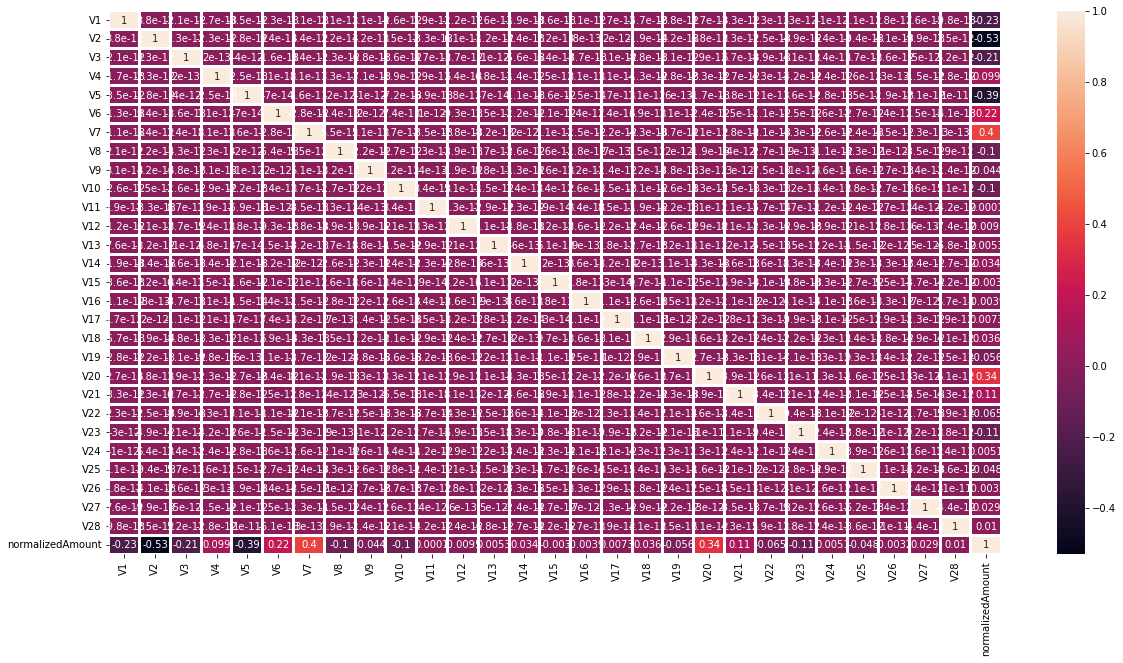

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, linewidths=2, annot=True)

In [ ]:
x = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']  # Response variable determining if fraud or not

In [ ]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


**Train/Test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [ ]:
x_train.shape

(199364, 29)

In [ ]:
x_test.shape

(85443, 29)

In [ ]:
df.isnull().sum()/df.shape[0]

V1                  0.0
V2                  0.0
V3                  0.0
V4                  0.0
V5                  0.0
V6                  0.0
V7                  0.0
V8                  0.0
V9                  0.0
V10                 0.0
V11                 0.0
V12                 0.0
V13                 0.0
V14                 0.0
V15                 0.0
V16                 0.0
V17                 0.0
V18                 0.0
V19                 0.0
V20                 0.0
V21                 0.0
V22                 0.0
V23                 0.0
V24                 0.0
V25                 0.0
V26                 0.0
V27                 0.0
V28                 0.0
Class               0.0
normalizedAmount    0.0
dtype: float64

In [ ]:
df.isnull().sum()

V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
Class               0
normalizedAmount    0
dtype: int64

**Applying Decision Tree** **Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [ ]:
decision_tree.fit(x_train,y_train.values.ravel())

DecisionTreeClassifier()

In [ ]:
y_pred = decision_tree.predict(x_test)

In [ ]:
decision_tree.score(x_test,y_test)

0.9992509626300574

**Accuracy Results and** **Confusion Matrix**

In [ ]:
# plottinig confusion matrix
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[85268    28]
 [   36   111]]


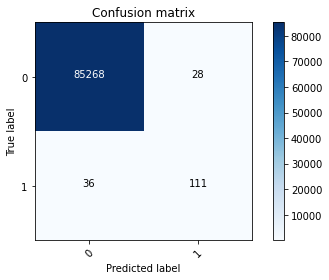

In [ ]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9993 	precision:0.7986 	recall:0.7551 	F1-score:0.7762


In [ ]:
results_testset = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,DecisionTree,0.999251,0.244898,0.755102,0.798561,0.776224


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


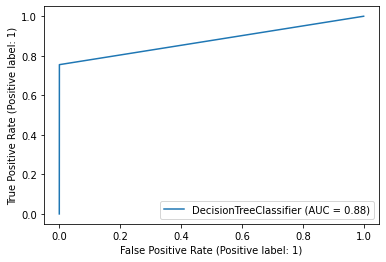

In [ ]:
ROC_RF = plot_roc_curve(decision_tree, x_test, y_test)
plt.show()

Confusion matrix, without normalization
[[284287     28]
 [    36    456]]


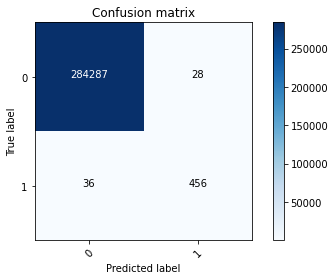

In [ ]:
# Confusion matrix on the whole dataset
y_pred = decision_tree.predict(x)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [ ]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9998 	precision:0.9421 	recall:0.9268 	F1-score:0.9344


In [ ]:
results_fullset = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,DecisionTree,0.999775,0.073171,0.926829,0.942149,0.934426


[Text(93.14063215775924, 212.71304347826086, 'X[16] <= -2.704\ngini = 0.003\nsamples = 199364\nvalue = [199019, 345]'),
 Text(67.53068181818182, 203.2591304347826, 'X[9] <= -1.458\ngini = 0.364\nsamples = 318\nvalue = [76, 242]'),
 Text(49.83954545454546, 193.80521739130435, 'X[25] <= -0.228\ngini = 0.278\nsamples = 282\nvalue = [47, 235]'),
 Text(32.71909090909091, 184.3513043478261, 'X[26] <= 0.915\ngini = 0.476\nsamples = 95\nvalue = [37, 58]'),
 Text(19.783636363636365, 174.89739130434782, 'X[13] <= -2.822\ngini = 0.299\nsamples = 60\nvalue = [11, 49]'),
 Text(12.174545454545456, 165.44347826086957, 'X[25] <= -0.265\ngini = 0.077\nsamples = 50\nvalue = [2, 48]'),
 Text(6.087272727272728, 155.98956521739132, 'X[27] <= 0.791\ngini = 0.042\nsamples = 47\nvalue = [1, 46]'),
 Text(3.043636363636364, 146.53565217391304, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]'),
 Text(9.130909090909093, 146.53565217391304, 'X[19] <= 0.175\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(6.0872727272

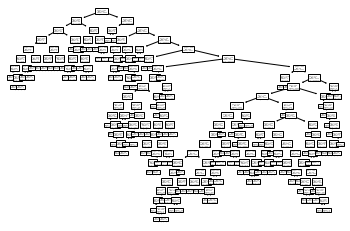

In [ ]:
from sklearn import tree
tree.plot_tree(decision_tree.fit(x_train,y_train)) 

**Applying Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)

In [ ]:
random_forest.fit(x_train,y_train.values.ravel())

RandomForestClassifier()

In [ ]:
y_pred = random_forest.predict(x_test)

In [ ]:
random_forest.score(x_test,y_test)

0.9995201479348805

Confusion matrix, without normalization
[[85290     6]
 [   35   112]]


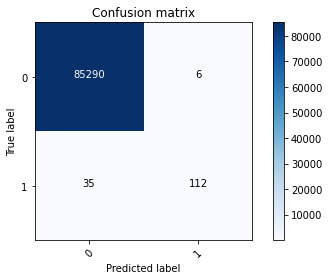

In [ ]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9995 	precision:0.9492 	recall:0.7619 	F1-score:0.8453


In [ ]:
model_results = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,DecisionTree,0.999251,0.244898,0.755102,0.798561,0.776224
1,RandomForest,0.999520,0.238095,0.761905,0.949153,0.845283


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


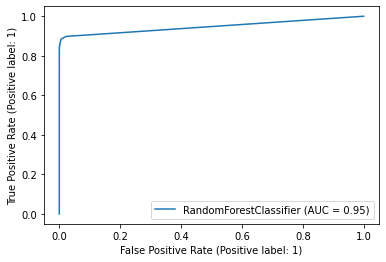

In [ ]:
ROC_DT = plot_roc_curve(random_forest, x_test, y_test)
plt.show()

Confusion matrix, without normalization
[[284309      6]
 [    35    457]]


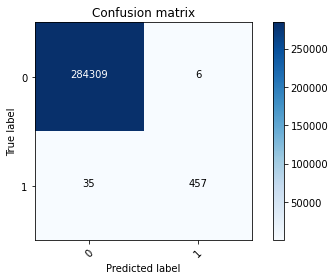

In [ ]:
# Confusion matrix on the whole dataset
y_pred = random_forest.predict(x)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [ ]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

In [ ]:
model_results = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,DecisionTree,0.999775,0.073171,0.926829,0.942149,0.934426
1,RandomForest,0.999856,0.071138,0.928862,0.987041,0.957068
